# **Legal Tech**
### *Hands-on Machine Learning mit SCOTUS-Daten*
##### Yoan Hermstrüwer
##### Herbstsemester 2023

## 0. Allgemeines

* Achtung: Dieses Notebook ist *nicht editierbar*. Wenn du deine eigenen Notizen hinzufügen möchtest, erstelle bitte zuerst eine Kopie. Hierfür klickst du auf `Datei > Kopie in Drive speichern`. Für diese Übung ist dies allerdings nicht zwingend nötig.
* Bei Fragen zu den Hands-On-Materialien kannst du dich gerne an Alison Kim (alison.kim@ius.uzh.ch) wenden.

## 1. Auffrischung

### 1.1 Supervised Learning

Wie du in Block 7 erfahren hast, gibt es im klassischen Machine Learning (ML) zwei Lernansätze: *supervised Learning* und *unsupervised Learning*.

Beim **supervised Learning**, welches wir in dieser Demo anwenden werden, wird der Algorithmus mit einem Trainingsdatensatz aus  *labeled Data* (DE: gekennzeichnete Daten) gefüttert. Die Labels werden zuvor meist händisch erstellt. Ein Label stellt das gewünschte Ergebnis dar, das der Algorithmus als "Antwort" auf einen ihm vorgezeigten Datenpunkt ausgeben soll.

Ein solcher Datenpunkt könnte z.B. ein Bild eines Hundes sein, und das dazugehörige Label das Wort "Hund". Der Algorithmus lernt, Muster im gekennzeichneten Trainingsdatensatz zu erkennen, und anhand von diesen Mustern neue, nicht im Trainingsdatensatz enthaltene Daten zu klassifizieren oder neue Ergebnisse vorherzusagen. Dem trainierten Algorithmus wird also ein Bild eines Hundes gezeigt, das er noch nie gesehen hat. Im Idealfall gibt der Algorithmus nun die Antwort "Hund" aus.

Im Gegensatz zum supervised Learning tragen die Daten beim **unsupervised Learning** keine Labels. Der Algorithmus muss also die Zusammenhänge zwischen den Variablen selbst erkennen. In dieser Demo werden wir uns nicht mit unsupervised Learning befassen.

### 1.2 Klassifikation

**Classification** (DE: Klassifikation) ist einer der fundamentalen Modellierungsansätze im supervised Learning. Das Ziel der Klassifikation ist es, Beobachtungen (Datenpunkte, z.B. Bild eines Hundes) in eine vordefinierte Kategorie (Klasse, z.B. "Hund") einzuordnen.

Um einen supervised Klassifikator zu trainieren, brauchen wir einen Trainingsdatensatz, in dem die Klasse jeder Beobachtung bereits bekannt (labeled) ist. Wir trainieren den Klassifikator, Merkmale im Datensatz zu erkennen, die die verschiedenen Klassen unterscheiden.

Die einfache Variante nennt sich **binäre Klassifikation**. Wie der Name verrät, ordnet ein binärer Klassifikator einen Datenpunkt einer von zwei Klassen zu. Beispiele hierfür sind:
* Kreditanträge (Klassen: genehmigt, abgelehnt)
* Hassrede in sozialen Medien (Klassen: Hassrede, nicht Hassrede)
* Funktionen des Genitivs (Klassen: [*Subjektivus*](https://de.wikipedia.org/wiki/Genetivus_subiectivus), [*Objektivus*](https://de.wikipedia.org/wiki/Genetivus_obiectivus))

**Multi-Class-Classification** ist die Zuordnung von einem Datenpunkt zu einer von mindestens drei Klassen. Der Klassifikator gibt dabei zu jedem Datenpunkt typischerweise nicht direkt die vorhergesagte Klasse aus, sondern die Wahrscheinlichkeiten jeder Klasse. Die Klasse mit dem höchsten Wahrscheinlichkeitswert wird als Vorhersage zugrunde gelegt. Es handelt sich um die probabilistische Zuordnung zu einer Klasse.

### 1.3 Aufteilen von Daten

Das Lernen besteht jeweils aus zwei Phasen: das Trainieren und das Testen (manchmal gehört auch das Validieren dazu, aber damit werden wir uns in dieser Demo nicht beschäftigen).
* Während des **Trainings** lernt der Algorithmus Muster, Merkmale und Zusammenhänge aus den Trainingsdaten, um Vorhersagen zu treffen.
* Das **Testen** dient zur Beurteilung der Fähigkeit des trainierten Algorithmus, zu neuen, dem Algorithmus unbekannten Daten korrekte Vorhersagen zu treffen.

Eine übliche Aufteilung sieht 80% des gesamten Datensatzes für das Training vor, und 20% für das Testen (EN: "80/20 split").

Warum sollte man Daten in Train- und Test-Untermengen aufteilen?
* **Bewertung der Generalisierungsfähigkeit:** Durch die Verwendung von Testdaten kann die Fähigkeit des Modells überprüft werden, das Gelernte auf unbekannte Daten zu verallgemeinern. Dies ist entscheidend, um sicherzustellen, dass das Modell nicht nur auswendig gelernt hat, sondern auch auf neue Daten richtig reagieren kann.
* **Vermeidung von Overfitting:** Wenn das Modell ausschliesslich mit den Trainingsdaten bewertet wird, könnte es zu Overfitting (DE: Überanpassung) kommen. Das Modell ist in diesen Fällen zu stark auf die Trainingsdaten angepasst und nicht gut auf neue Daten generalisiert.
* **Bewertung anhand von Evaluationsmetriken:** Die Testdaten ermöglichen die Berechnung verschiedener Evaluationsmetriken wie Accuracy (DE: Genauigkeit), Precision (DE: Präzision), Recall (DE: Rückruf) und F1-Score, um die Qualität der Vorhersagen zu bewerten.

### 1.4 Evaluationsmetriken

#### 1.4.1 Genauigkeit (EN: Accuracy)

Die Genauigkeit misst den Prozentsatz der korrekt klassifizierten Instanzen im Verhältnis zur Gesamtanzahl der Instanzen. Sie ist ein einfaches Mass für die Gesamtleistung eines Klassifikationsmodells und wird berechnet durch die Formel:

$$ \text{accuracy} = \frac{\sum\left(\text{Korrekt klassifizierte Instanzen}\right)}{\text{Gesamtanzahl der Instanzen}} $$

#### 1.4.2 Präzision (EN: Precision)

Die Präzision gibt an, wie viele der als positiv vorhergesagten Instanzen tatsächlich positiv sind. Sie wird berechnet durch:

$$ \text{precision} = \frac{\sum\left(\text{Wahr-Positive}\right)}{\sum\left(\text{Wahr-Positive}\right) + \sum\left(\text{Falsch-Positive}\right)} $$

#### 1.4.3 Rückruf (EN: Recall):
Der Rückruf misst den Prozentsatz der tatsächlich positiven Instanzen, die korrekt vorhergesagt wurden. Die Formel lautet:

$$ \text{recall} = \frac{\sum\left(\text{Wahr-Positive}\right)}{\sum\left(\text{Wahr-Positive}\right) + \sum\left(\text{Falsch-Negative}\right)} $$

#### 1.4.4 F1-Wert (EN: F1 Score)
Der F1-Wert ist das harmonische Mittel zwischen Präzision und Rückruf und gibt ein ausgewogenes Mass für die Leistung des Modells. Er wird berechnet durch:

$$ F1 = \frac{2 * (\text{precision * recall})}{(\text{precision + recall})} $$

#### 1.4.5 Verwirrungsmatrix (EN: Confusion Matrix)
Die Verwirrungsmatrix ist eine Tabelle, die die Leistung eines Klassifikationsmodells aufzeigt. Sie enthält die Anzahl der wahr-positiven, wahr-negativen, falsch-positiven und falsch-negativen Vorhersagen. Die Matrix bietet einen detaillierten Einblick in die Stärken und Schwächen des Modells und dient als Grundlage für die Berechnung von Genauigkeit, Präzision, Rückruf und F1-Wert.

## 2. Libraries

Führe die beiden untenstehenden Zellen aus (fahre dazu mit der Maus über die eckigen Klammern und klicke auf das Play-Symbol), um die benötigten Libraries (DE: Programmbibliotheken) auf deinem Rechner zu installieren und sie in dieses IDE (Integrated Development Environment, DE: integrierte Entwicklungsumgebung) zu importieren.

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install prettytable
!pip install scikit-learn

In [2]:
import re # Library zu regular expressions (DE: reguläre Ausdrücke)
from typing import Tuple # Klasse zum Schreiben einer Hilfsfunktion (CS: utility function)

import warnings # Einstellung: Fehlermeldung stummschalten
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # Library zum Darstellen von Datensätzen
import numpy as np # Library zum Rechnen mit Daten
import pandas as pd # Library zum Erstellen und Manipulieren von Datensätzen
from sklearn.linear_model import LogisticRegression # Modell importieren: Logistische Regression
from sklearn.metrics import classification_report, confusion_matrix # Funktionen importieren: Evaluation des Modells
from sklearn.model_selection import train_test_split # Funktion importieren: Datenaufteilung
from sklearn.naive_bayes import ComplementNB # Modell importieren: Naive Bayes
from sklearn.svm import SVC # Modell importieren: Support Vector Machine
from prettytable import PrettyTable # Klasse importieren: print-Statements verschönern

import gdown
from google.colab import drive # Verbindung zu Google Drive herstellen, um auf den Datensatz zuzugreifen

## 3. Datensatz
Für diese Demo werden wir mit Daten aus der  <a href="http://scdb.wustl.edu/about.php" target="_blank">Supreme Court Database</a> arbeiten. Diese Datenbank erfasst und klassifiziert jede einzelne Stimme aller SCOTUS-Richter\*innen zwischen 1791 und 2021 (wird regelmässig aktualisiert).

### 3.1 Herunterladen
Führe die untenstehenden Zellen aus, um den Datensatz herunterzuladen und ihn in einen ```pandas.DataFrame``` umzuwandeln.

**Quelle:** [MODERN Database: 2022 Release 01, Justice Centered Data, Cases Organized by Supreme Court Citation](http://scdb.wustl.edu/data.php)

In [3]:
drive.mount('/content/drive', force_remount=True) # Verbindung zu deinem Google Drive herstellen

Mounted at /content/drive


Erstelle einen Ordner für den Datensatz.

In [4]:
cd drive/MyDrive

/content/drive/MyDrive


In [5]:
mkdir hs23-legaltech-ml-demo # Bei der Fehlermeldung "File exists" kannst du einfach weiter

mkdir: cannot create directory ‘hs23-legaltech-ml-demo’: File exists


Gehe in diesen Ordner.

In [6]:
cd hs23-legaltech-ml-demo

/content/drive/MyDrive/hs23-legaltech-ml-demo


Lade den Datensatz auf diesem Ordner herunter.

In [7]:
dataset_link = 'https://drive.google.com/drive/folders/17euMJ0_So7_MePtJrjt2kOJrPnt4Zc2M?usp=drive_link'
gdown.download_folder(dataset_link, quiet=False)

Retrieving folder list


Processing file 1PYn3nU8nkfVLP7z3Ch7HKMPdsOW_S1sl Klassifikation_SCOTUS.ipynb
Processing file 1Eax_2y_trRN7MmgpsdL2p6Jgrd3G3Hao SCDB_2022_01_justiceCentered_Citation.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1PYn3nU8nkfVLP7z3Ch7HKMPdsOW_S1sl
To: /content/drive/MyDrive/hs23-legaltech-ml-demo/ML_Hands-On_SCOTUS/Klassifikation_SCOTUS.ipynb
100%|██████████| 53.5k/53.5k [00:00<00:00, 36.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Eax_2y_trRN7MmgpsdL2p6Jgrd3G3Hao
To: /content/drive/MyDrive/hs23-legaltech-ml-demo/ML_Hands-On_SCOTUS/SCDB_2022_01_justiceCentered_Citation.csv
100%|██████████| 28.8M/28.8M [00:00<00:00, 53.9MB/s]
Download completed


['/content/drive/MyDrive/hs23-legaltech-ml-demo/ML_Hands-On_SCOTUS/Klassifikation_SCOTUS.ipynb',
 '/content/drive/MyDrive/hs23-legaltech-ml-demo/ML_Hands-On_SCOTUS/SCDB_2022_01_justiceCentered_Citation.csv']

Wandle die CSV-Datei in einen `pandas.DataFrame` (Tabelle) um.

In [8]:
df = pd.read_csv('ML_Hands-On_SCOTUS/SCDB_2022_01_justiceCentered_Citation.csv', encoding='ISO-8859-1')

In [9]:
df.head(5) # die ersten 5 Einträge anzeigen

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [10]:
cols = df.columns
print(f'Der Datensatz enthält insgesamt:\n  * {df.shape[0]} Datenpunkte\n  * {len(cols)} Spalten bzw. Variablen:\n\t{cols}')

Der Datensatz enthält insgesamt:
  * 82015 Datenpunkte
  * 61 Spalten bzw. Variablen:
	Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes

### 3.2 Bereinigen (Teil des Pre-processing)

Wir arbeiten in dieser Demo mit einer Teilmenge des Datensatzes.

#### 3.2.1 Zeitraum

Wir konzentrieren uns auf die Entscheide von SCOTUS-Richter\*innen, die mindestens fünf Jahre im [Roberts-Gericht (2005-heute)](https://supreme.justia.com/supreme-court-history/roberts-court/) gedient haben.
* John Paul Stevens (1975-2010)
* Antonin Scalia (1986-2016)
* Anthony Kennedy (1988-2018)
* Clarence Thomas (1991-heute)
* Ruth Bader Ginsberg (1993-2020)
* Stephen Breyer (1994-2022)
* John G. Roberts (2005-heute)
* Samuel Alito (2006-heute)
* Sonia Sotomayor (2009-heute)
* Elena Kagan (2010-heute)
* Neil Gorsuch (2017-heute)
* Brett Kavanaugh (2018-heute)

Nicht aufgenommen: Sandra Day O'Connor (1981-2006), David Souter (1990-2009), Amy Coney Barrett (2020-heute), Ketanji Brown Jackson (2022-heute)

#### 3.2.2 Rechtsgebiete
Zudem werden wir uns nur mit sieben groben Rechtsgebieten beschäftigen, und zwar:
* Criminal procedure (DE: Strafverfahren)
* Civil rights (DE: Bürgerrechte)
* First Amendment (DE: 1\. Zusatzartikel zur US-Verfassung)
* Privacy (DE: Privatsphäre)
* Judicial power (DE: Judikative)
* Interstate relations (DE: zwischenstaatliche Verhältnisse)
* Economic activity (DE: Wirtschaftstätigkeit)

#### 3.2.3 Variablen
Der ursprüngliche Datensatz umfasst insgesamt 61 Variablen. In dieser Klassifikations-Pipeline interessieren wir uns für 18:
* `caseId`, `caseName`: ID bzw. Titel des Falles
* `sctCite`, `ledCite`, `lexisCite`: Zitierung (unterschiedliche Formate)
* `dateDecision`: Datum des Entscheids (MM/TT/JJJJ)
* `issueArea`: Thema (allgemein)
* `issue`: Thema (spezifisch)
* `chief`: Name des obersten Richters (US-EN: Chief Justice)
* `justiceID`, `justiceName`: ID bzw. Name der Richterin oder des Richters
* `vote`: Votum
  * 1=majority
  * 2=dissent (DE: Sondervotum)
* `opinion`: Votum der Richterin oder des Richters
  * 1=kein Votum verfasst
  * 2=individuelles Votum verfasst
  * 3=Votum mitverfasst
* `decisionDirection`: Tendenz des Entscheids
  * 1=konservativ
  * 2=liberal
  * 3=nicht bestimmbar
* `majOpinWriter`: Verfasser*in der Mehrheitsmeinung
* `majVotes`, `minVotes`: Anzahl an Richter*innen, die sich dem Mehrheits- bzw. Minderheitsvotum (EN: dissenting opinion) angeschlossen haben
* `precedentAlteration`: Veränderung eines Präzedenzfalls
  * 0=nein (keine Veränderung)
  * 1=ja

#### 3.2.4 Code zur Bereinigung
Führe die untenstehenden Zellen aus, um den Datensatz zu bereinigen. Du brauchst dir den folgenden Code nicht anzuschauen, es sei denn, du möchtest einiges über Datenbereinigung und -vorbereitung erfahren!

In [11]:
variables = [ # beliebige Variablen, siehe oben für Definitionen und mögliche Werte
    'caseId', 'caseName', 'sctCite', 'ledCite', 'lexisCite', # ID Variablen
    'dateDecision', 'chief', # Zeitvariablen
    'issueArea', 'issue', # thematische Variablen
    'justice', 'justiceName', 'vote', 'opinion', 'decisionDirection', # Votumsvariablen
    'majOpinWriter', 'majVotes', 'minVotes', 'precedentAlteration' # Votumsvariablen
]

issue_area_id = { # Fallthemen
    1: 'criminal procedure',
    2: 'civil rights',
    3: 'first amendment',
    5: 'privacy',
    8: 'economic activity',
    9: 'judicial power',
    11: 'interstate relations'
}

justices = [ # Richter*innen, die mindestens 5 Jahre im Roberts-Gericht gedient haben
    'JPStevens', 'AScalia', 'AMKennedy', 'CThomas', 'RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito', 'SSotomayor', 'EKagan', 'NMGorsuch', 'BMKavanaugh'
]

vote_types = { # Wir nehmen entweder majority oder dissenting opinion auf
    1: 'majority',
    2: 'dissent'
}

In [12]:
# Hilfsfunktion
def parse_decision_date(date: str) -> Tuple[int, int]:
  """Eine Datums-Kettenzeiche des Formats (M)M/(T)T/JJJJ in (M)M, (T)T und JJJJ (Tupel) aufteilen."""
  month, day, year = re.search(r'^(\d{,2}).(\d{,2}).(\d{4})$', date).group(1, 2, 3)
  return (int(year), int(month), int(day))

In [13]:
# Teilmenge definieren
scotus = df[variables] # beliebige Variablen behalten
scotus = scotus.dropna(axis='index') # Zeilen mit fehlenden Informationen (NaN = not a number) entfernen
scotus = scotus.loc[scotus['chief'] == 'Roberts'] # Fälle aus dem Roberts-Gericht
scotus = scotus.loc[scotus['justiceName'].apply(lambda justice: justice in justices)] # Richter*innen, die seit mindestens 5 Jahren im Roberts-Gericht dienen
scotus = scotus.loc[scotus['issueArea'].apply(lambda issue: issue in issue_area_id.keys())] # beliebige Themen behalten
scotus = scotus.loc[scotus['vote'].apply(lambda vote: vote in vote_types)] # nur Mehrheits- und Sondervoten behalten
scotus['vote'] = scotus['vote'].replace(2, 0) # Sondervoten als 0 umdefinieren (von 2)
scotus = scotus.astype({'issueArea': 'int16', 'issue': 'int16', 'vote': 'int16', 'opinion': 'int16', 'decisionDirection': 'int16', 'majOpinWriter': 'int16', 'precedentAlteration': 'int16'}) # Zahlen in integer (DE: Ganzzahl) umwandeln

# Variable 'dateDecision' in Jahr, Monat und Tag aufteilen
years = scotus.apply(lambda x: parse_decision_date(x['dateDecision'])[0], axis=1)
months = scotus.apply(lambda x: parse_decision_date(x['dateDecision'])[1], axis=1)
days = scotus.apply(lambda x: parse_decision_date(x['dateDecision'])[2], axis=1)

scotus.insert(6, 'yearDecision', years) # Jahr-Spalte hinzufügen
scotus.insert(7, 'monthDecision', months) # Monat-Spalte hinzufügen
scotus.insert(8, 'dayDecision', days) # Tag-Spalte hinzufügen
scotus = scotus.drop('dateDecision', axis='columns') # ursprüngliche Datum-Spalte entfernen

# Indexierung zurücksetzen
scotus = scotus.reset_index()

In [14]:
scotus.head(5) # die ersten 5 Einträge anzeigen

,index,caseId,caseName,sctCite,ledCite,lexisCite,yearDecision,monthDecision,dayDecision,chief,...,issue,justice,justiceName,vote,opinion,decisionDirection,majOpinWriter,majVotes,minVotes,precedentAlteration
0,70540,2005-006,"UNITED STATES v. JOSEPH OLSON, et al.",126 S. Ct. 510,163 L. Ed. 2d 306,2005 U.S. LEXIS 8372,2005,11,8,Roberts,...,14534,103,JPStevens,1,1,1,110,9,0,0
1,70542,2005-006,"UNITED STATES v. JOSEPH OLSON, et al.",126 S. Ct. 510,163 L. Ed. 2d 306,2005 U.S. LEXIS 8372,2005,11,8,Roberts,...,14534,105,AScalia,1,1,1,110,9,0,0
2,70543,2005-006,"UNITED STATES v. JOSEPH OLSON, et al.",126 S. Ct. 510,163 L. Ed. 2d 306,2005 U.S. LEXIS 8372,2005,11,8,Roberts,...,14534,106,AMKennedy,1,1,1,110,9,0,0
3,70545,2005-006,"UNITED STATES v. JOSEPH OLSON, et al.",126 S. Ct. 510,163 L. Ed. 2d 306,2005 U.S. LEXIS 8372,2005,11,8,Roberts,...,14534,108,CThomas,1,1,1,110,9,0,0
4,70546,2005-006,"UNITED STATES v. JOSEPH OLSON, et al.",126 S. Ct. 510,163 L. Ed. 2d 306,2005 U.S. LEXIS 8372,2005,11,8,Roberts,...,14534,109,RBGinsburg,1,1,1,110,9,0,0


### 3.3 Deskriptive Statistiken

Deskriptive Statistiken geben einen Einblick in die Daten. Es werden dabei keine Vorhersagen oder Schlussfolgerungen (Inferenzen) getroffen.

#### 3.3.1 Datensatzgrösse

In [15]:
data_size = scotus.shape[0]

print(f'Der bereinigte Datensatz enthält nun {data_size} Datenpunkte.')

Der bereinigte Datensatz enthält nun 7032 Datenpunkte.


#### 3.3.2 Art des Votums

In [16]:
count_opinion = scotus['vote'].value_counts(sort=False)
count_majority = count_opinion[1] # 1 = Mehrheitsvotum
count_dissenting = count_opinion[0] # 0 = Sondervotum

Majority: 5570
Dissenting: 1462


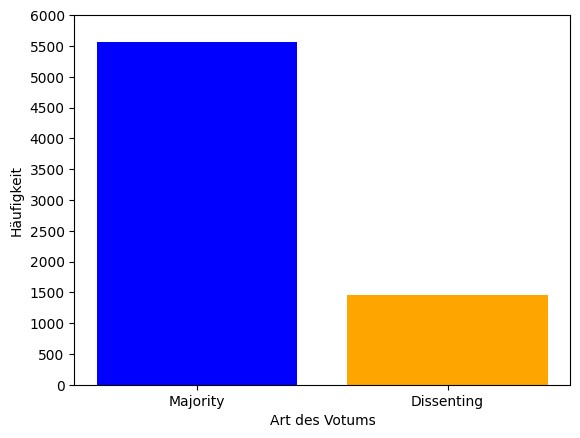

In [17]:
# Statistiken
print(f'Majority: {count_majority}')
print(f'Dissenting: {count_dissenting}')

# Graphik
plt.bar( # Balkendiagramm erstellen
  x=['Majority', 'Dissenting'],
  height=[count_majority, count_dissenting],
  color=['blue', 'orange']
)

plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Art des Votums') # x-Achse definieren

plt.yticks(np.arange(0, 6100, 500)) # y-Schrittweite definieren

plt.show();

#### 3.3.3 Fallzahl

In [18]:
unique_cases = scotus[['caseId', 'yearDecision']].drop_duplicates() # Jeder einzelner Fall mit dem entsprechenden Entscheidjahr
count_cases_per_year = unique_cases.groupby('yearDecision').size().reset_index(name='countCases') # Fallzahl pro Jahr berechnen und neue Dataframe daraus erstellen

Fälle pro Jahr (2005-2022)
    yearDecision  countCases
0           2005           5
1           2006          58
2           2007          61
3           2008          55
4           2009          68
5           2010          61
6           2011          63
7           2012          53
8           2013          60
9           2014          52
10          2015          57
11          2016          58
12          2017          50
13          2018          53
14          2019          51
15          2020          48
16          2021          44
17          2022          44

Durchschnitt: 52.27777777777778 Fälle
Median: 54.0 Fälle


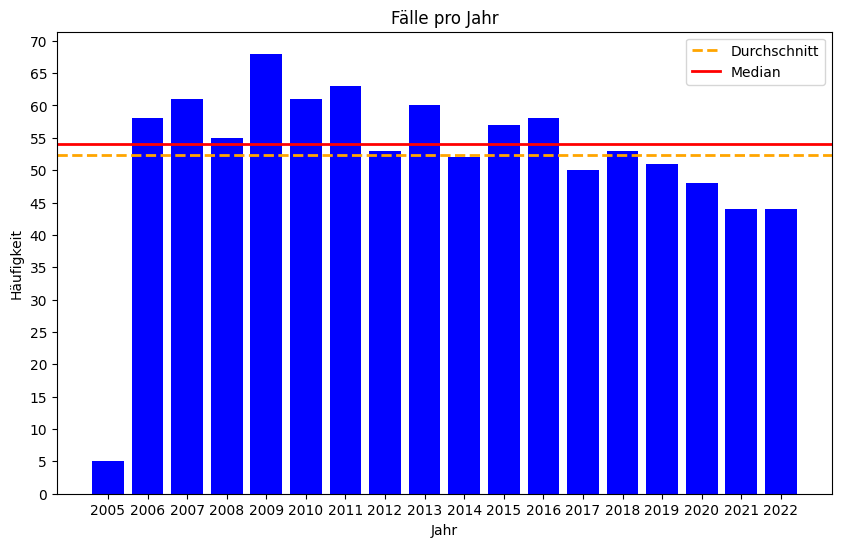

In [19]:
# Statistiken auf der Konsole anzeigen
print(f'Fälle pro Jahr (2005-2022)\n{count_cases_per_year}')
print(f'')
print(f'Durchschnitt: {count_cases_per_year["countCases"].mean()} Fälle')
print(f'Median: {count_cases_per_year["countCases"].median()} Fälle')

# Graphik
plt.figure(figsize=(10,6)) # Grösse des Diagramms definieren

plt.bar( # Balkendiagramm erstellen
  x=count_cases_per_year['yearDecision'],
  height=count_cases_per_year['countCases'],
  color='blue'
)

plt.axhline( # Durchscnitt als Linie anzeigen
    y=count_cases_per_year["countCases"].mean(),
    color='orange',
    linestyle='--',
    label='Durchschnitt',
    linewidth=2
)

plt.axhline( # Median als Linie anzeigen
    y=count_cases_per_year["countCases"].median(),
    color='red',
    linestyle='-',
    label='Median',
    linewidth=2
)

plt.title('Fälle pro Jahr') # Titel definieren
plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Jahr') # x-Achse definieren

plt.xticks(ticks=count_cases_per_year['yearDecision'], labels=count_cases_per_year['yearDecision']) # x-Schrittweite definieren
plt.yticks(np.arange(0, 71, 5)) # y-Schrittweite definieren

plt.legend(loc=0) # Legende erstellen

plt.show();

#### 3.3.4 Anzahl an Voten

##### 3.3.3.1 Pro Jahr

In [20]:
count_votes_per_year = scotus['yearDecision'].value_counts(sort=False)

count_majority_per_year = scotus[scotus['vote'] == 1]['yearDecision'].value_counts().sort_index() # Anzahl an Mehrheitsvoten (1 = majority)
count_dissent_per_year = scotus[scotus['vote'] == 0]['yearDecision'].value_counts().sort_index() # Anzahl an Sondervoten (0 = dissent)
count_year_combined = pd.concat([count_majority_per_year, count_dissent_per_year], axis=1, keys=['majority (= 1)', 'dissent (= 0)']) # Anzahlen in einer Dataframe darstellen

years = count_year_combined.index # Jahre

Voten pro Jahr
      majority (= 1)  dissent (= 0)
2005              29              4
2006             315             68
2007             319            111
2008             284            100
2009             381            107
2010             361             99
2011             394             90
2012             350             83
2013             371            101
2014             325             75
2015             359            106
2016             369             61
2017             318             49
2018             325             89
2019             309             98
2020             294             79
2021             242             60
2022             225             82

Durchschnitt (alle Voten): 390.6666666666667
  Durchschnitt (majority): 309.44444444444446
  Durchschnitt (dissent): 81.22222222222223

Median (alle Voten): 410.5
  Median (majority): 322.0
  Median (dissent): 86.0


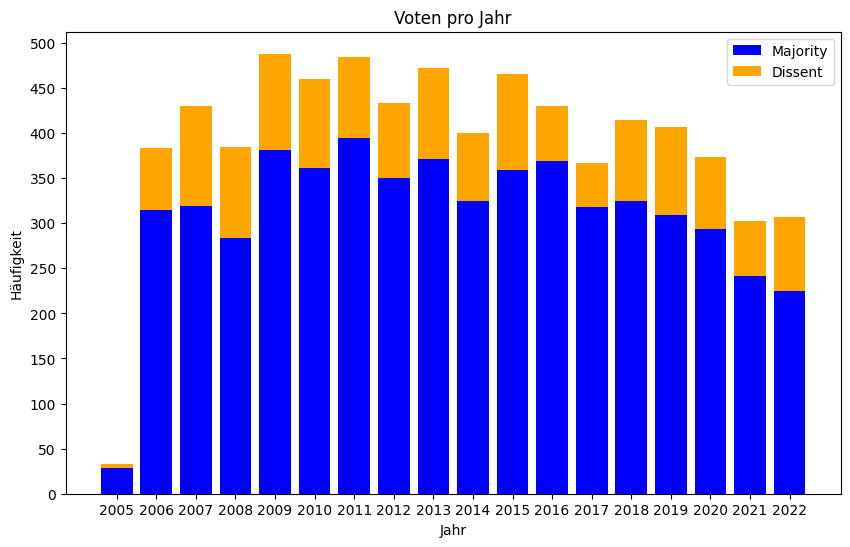

In [21]:
# Statistiken
print(f'Voten pro Jahr\n{count_year_combined}')
print(f'')
print(f'Durchschnitt (alle Voten): {count_votes_per_year.mean()}')
print(f'  Durchschnitt (majority): {count_majority_per_year.mean()}')
print(f'  Durchschnitt (dissent): {count_dissent_per_year.mean()}')
print(f'')
print(f'Median (alle Voten): {count_votes_per_year.median()}')
print(f'  Median (majority): {count_majority_per_year.median()}')
print(f'  Median (dissent): {count_dissent_per_year.median()}')

# Graphik
plt.figure(figsize=(10,6)) # Grösse des Diagramms definieren

plt.bar( # Balkendiagramm erstellen
    x=years,
    height=count_majority_per_year,
    color='blue',
    label='Majority'
)

plt.bar( # Diagramm erstellen: dissent
  x=years,
  bottom=count_majority_per_year,
  height=count_dissent_per_year,
  color='orange',
  label='Dissent'
)


plt.title('Voten pro Jahr') # Titel definieren
plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Jahr') # x-Achse definieren

plt.xticks(ticks=years, labels=years) # x-Schrittweite definieren
plt.yticks(np.arange(0, 510, 50)) # y-Schrittweite definieren

plt.legend(loc=0) # Legende erstellen

plt.show();

##### 3.3.3.2 Pro Richter*in

In [22]:
count_votes_per_justice = scotus['justiceName'].value_counts(sort=False) # Anzahl an Fällen pro Richter*in berechnen

count_majority_per_justice = scotus[scotus['vote'] == 1]['justiceName'].value_counts().sort_index() # Anzahl an Mehrheitsvoten (1 = majority)
count_dissent_per_justice = scotus[scotus['vote'] == 0]['justiceName'].value_counts().sort_index() # Anzahl an Sondervoten (0 = dissent)
counts_combined = pd.concat([count_majority_per_justice, count_dissent_per_justice], axis=1, keys=['majority (= 1)', 'dissent (= 0)']) # Anzahlen in einer Dataframe darstellen

justices = counts_combined.index # Namen der Richter*innen

count_majority = np.fromiter(count_majority_per_justice.to_dict().values(), dtype='int32')
count_dissent = np.fromiter(count_dissent_per_justice.to_dict().values(), dtype='int32')

Voten pro Richter*in
             majority (= 1)  dissent (= 0)
AMKennedy               625             64
AScalia                 392            112
BMKavanaugh             144             14
CThomas                 549            210
EKagan                  471            104
JGRoberts               788            104
JPStevens               162            102
NMGorsuch               154             44
RBGinsburg              577            193
SAAlito                 601            174
SGBreyer                646            195
SSotomayor              461            146

Durchschnitt (alle Voten): 586.0
  Durchschnitt (majority): 464.1666666666667
  Durchschnitt (dissent): 121.83333333333333

Median (alle Voten): 648.0
  Median (majority): 510.0
  Median (dissent): 108.0


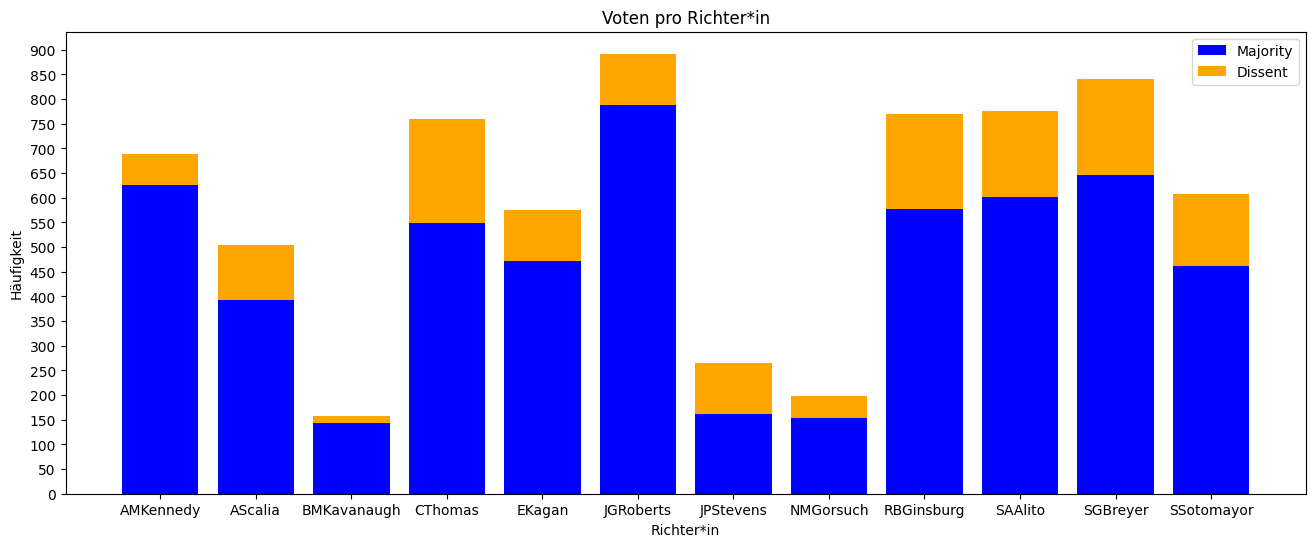

In [23]:
# Statistiken
print(f'Voten pro Richter*in\n{counts_combined}')
print(f'')
print(f'Durchschnitt (alle Voten): {count_votes_per_justice.mean()}')
print(f'  Durchschnitt (majority): {count_majority_per_justice.mean()}')
print(f'  Durchschnitt (dissent): {count_dissent_per_justice.mean()}')
print(f'')
print(f'Median (alle Voten): {count_votes_per_justice.median()}')
print(f'  Median (majority): {count_majority_per_justice.median()}')
print(f'  Median (dissent): {count_dissent_per_justice.median()}')

# Graphik
plt.figure(figsize=(16,6)) # Grösse des Diagramms definieren

plt.bar( # Diagramm erstellen: majority
  x=justices,
  height=count_majority,
  color='blue',
  label='Majority'
)

plt.bar( # Diagramm erstellen: dissent
  x=justices,
  bottom=count_majority,
  height=count_dissent,
  color='orange',
  label='Dissent'
)

plt.title('Voten pro Richter*in')
plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Richter*in') # x-Achse definieren

plt.xticks(ticks=np.arange(len(justices)), labels=justices) # x-Schrittweite definieren
plt.yticks(np.arange(0, 910, 50)) # y-Schrittweite definieren

plt.legend(loc=0) # Legende erstellen

plt.show();

Wir können diese Verteilung anders darstellen, und zwar im Verhältnis Sondervoten zu Gesamtzahl der Voten.

In [24]:
prop_dissent_per_justice = count_dissent_per_justice / count_votes_per_justice # Verhältnis von Sondervoten zu allen Voten pro Richter*in berechnen

Verhältnis von Sondervoten zu allen Voten pro Richter*in
AMKennedy      0.092888
AScalia        0.222222
BMKavanaugh    0.088608
CThomas        0.276680
EKagan         0.180870
JGRoberts      0.116592
JPStevens      0.386364
NMGorsuch      0.222222
RBGinsburg     0.250649
SAAlito        0.224516
SGBreyer       0.231867
SSotomayor     0.240527
Name: justiceName, dtype: float64


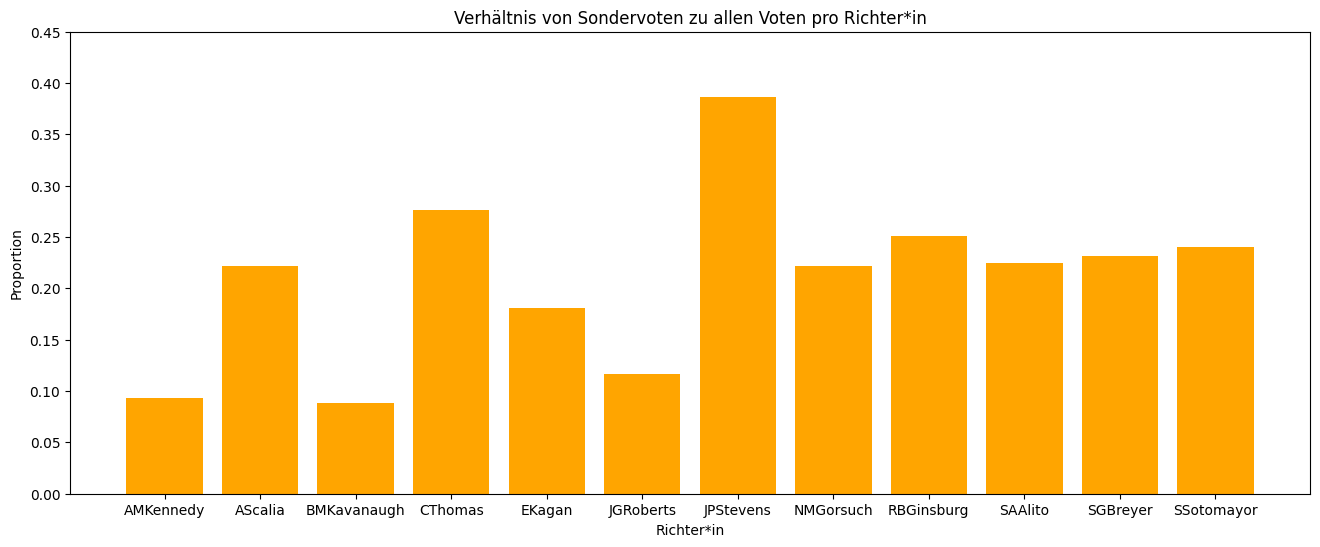

In [25]:
# Statistiken
print(f'Verhältnis von Sondervoten zu allen Voten pro Richter*in\n{prop_dissent_per_justice}')

# Graphik
plt.figure(figsize=(16,6)) # Grösse des Diagramms definieren

plt.bar( # Diagramm erstellen: majority
  x=justices,
  height=prop_dissent_per_justice,
  color='orange'
)

plt.title('Verhältnis von Sondervoten zu allen Voten pro Richter*in')
plt.ylabel('Proportion') # y-Achse definieren
plt.xlabel('Richter*in') # x-Achse definieren

plt.xticks(ticks=np.arange(len(justices)), labels=justices) # x-Schrittweite definieren
plt.yticks(np.arange(0, 0.5, 0.05)) # y-Schrittweite definieren

plt.show();

##### 3.3.3.3 Pro Rechtsgebiet

In [26]:
count_votes_per_issue = scotus['issueArea'].value_counts(sort=False).rename(index=issue_area_id)

issues = issue_area_id.values()
count_issues = np.fromiter(count_votes_per_issue.to_dict().values(), dtype='int32')

Voten pro Thema
economic activity       1978
civil rights            1342
judicial power           975
criminal procedure      2068
privacy                  160
first amendment          428
interstate relations      81
Name: issueArea, dtype: int64

Durchschnitt: 1004.5714285714286
Median: 975.0


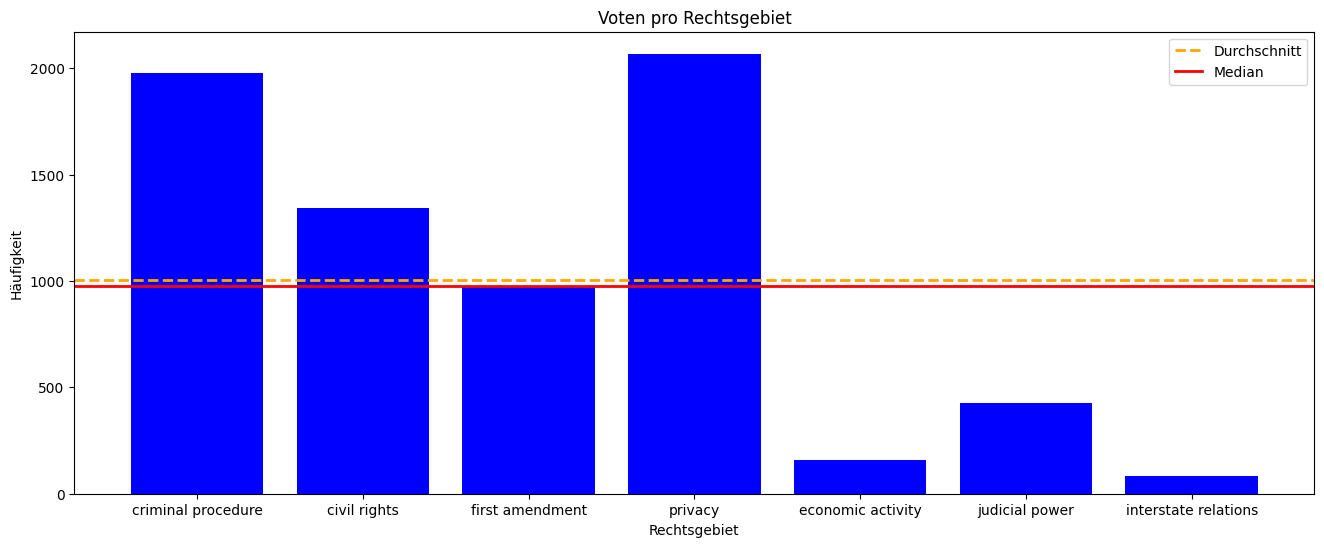

In [27]:
# Statistiken
print(f'Voten pro Thema\n{count_votes_per_issue}')
print(f'')
print(f'Durchschnitt: {count_votes_per_issue.mean()}')
print(f'Median: {count_votes_per_issue.median()}')

# Graphik
plt.figure(figsize=(16,6)) # Grösse des Diagramms definieren

plt.bar( # Diagramm erstellen
  x=issues,
  height=count_issues,
  color='blue'
)

plt.axhline( # Durchscnitt als Linie anzeigen
    y=count_votes_per_issue.mean(),
    color='orange',
    linestyle='--',
    label='Durchschnitt',
    linewidth=2
)

plt.axhline( # Median als Linie anzeigen
    y=count_votes_per_issue.median(),
    color='red',
    linestyle='-',
    label='Median',
    linewidth=2
)

plt.title('Voten pro Rechtsgebiet')
plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Rechtsgebiet') # x-Achse definieren

plt.xticks(ticks=np.arange(len(issues)), labels=issue_area_id.values()) # x-Schrittweite definieren
plt.yticks(np.arange(0, 2100, 500)) # y-Schrittweite definieren

plt.legend(loc='upper right') # Legende erstellen

plt.show();

## 4. Machine Learning: los geht's!

Wir interessieren uns dafür, ob die Voten anhand gewisser Features vorhergesagt werden können. Dazu verwenden wir drei verschiedene Modelle, und zwar: logistische Regression, Naive Bayes und Support Vector Machines.

### 4.1 Modelle: Überblick

#### 4.1.1 Logistische Regression (Logit)

Logistische Regression ist ein weitverbreiteter Algorithmus in ML für die binäre Klassifikation. Der Ansatz basiert auf der Annahme, dass die logarithmierten Odds eines Ereignisses linear von den Eingabevariablen abhängen. Während des Trainings passt der Algorithmus die Regressionskoeffizienten an, um die Wahrscheinlichkeit zu modellieren, dass eine Beobachtung zu einer der beiden Klassen gehört. Dies geschieht durch Anwendung der Logit-Transformation auf eine lineare Kombination der Prädiktoren. Die resultierende Funktion ermöglicht es, Vorhersagen über die Zugehörigkeit zu einer Klasse für neue Datenpunkte zu treffen.

Ein wesentlicher Vorteil der logistischen Regression liegt in ihrer interpretierbaren Natur, da die geschätzten Koeffizienten anzeigen, wie stark jede Variable zur Vorhersage beiträgt. Darüber hinaus eignet sich der Algorithmus gut für datenwissenschaftliche Aufgaben, bei denen die Aufteilung der Daten in zwei Klassen im Vordergrund steht.

#### 4.1.2 Naive Bayes

Naive-Bayes-Klassifikation ist ein probabilistischer Algorithmus, der auf dem Bayes-Theorem basiert. Dieser Ansatz geht davon aus, dass die Merkmale eines Datensatzes unabhängig voneinander sind, was zur Einfachheit des Modells beiträgt (aber oft in der Praxis nicht der Realität entspricht). Während des Trainings berechnet der Algorithmus die Wahrscheinlichkeiten, dass bestimmte Merkmalskombinationen zu einer bestimmten Klasse gehören. Bei der Klassifikation eines neuen Datenpunkts wird dann die Klasse mit der höchsten Wahrscheinlichkeit ausgewählt. Naive Bayes ist besonders effektiv für Textdaten, wie etwa in der Spamfilterung, aber auch in anderen Anwendungen, bei denen die Annahme der Unabhängigkeit der Merkmale angemessen ist.

Ein wesentlicher Vorteil dieses Algorithmus liegt in seiner Einfachheit und Effizienz, insbesondere bei großen Datensätzen. Trotz der "naiven" Annahme der Unabhängigkeit erzielt Naive Bayes oft gute Ergebnisse und kann als schnelle und robuste Methode für die Klassifikation dienen.

#### 4.1.3 Support Vector Machines (SVM)

SVM sind Algorithmen für die Klassifikation in ML. Ihr Hauptziel besteht darin, eine optimale Entscheidungsgrenze zwischen verschiedenen Klassen zu finden, indem der Abstand zu den nächstgelegenen Datenpunkten, den sogenannten *Support Vektoren*, maximiert wird. SVM sind besonders effektiv in der Handhabung linear separierbarer Daten, und sie können auch mithilfe von Kernel-Tricks nichtlineare Entscheidungsgrenzen modellieren. Während des Trainings lernt der SVM-Algorithmus, die Daten anhand von Hyperebenen in einem hochdimensionalen Raum zu klassifizieren. Diese Fähigkeit, sowohl mit linearen als auch nichtlinearen Strukturen umzugehen, macht SVM zu einem beliebten Werkzeug für die Klassifikation in verschiedenen Anwendungsbereichen wie Bilderkennung und Textklassifikation.

### 4.2 Untersuchung 1: Einfluss von 2 Features

Als erstes untersuchen wir den Einfluss von **2** Features auf das Ergebnis (1 = majority, 0 = dissent).

#### 4.2.1 Datenvorbereitung- und Aufteilung

Führe die untenstehenden Zellen aus, um die Daten vorzubereiten und aufzuteilen.

In [28]:
test_size = 0.15 # Testmengen-Verhältnis definieren (üblicherweise 15-25%)

In [29]:
classes = ['0 (dissent)', '1 (majority)'] # Klassen definieren

In [30]:
df_exp1 = scotus[['justice', 'issueArea', 'vote']] # entsprechende Teilmenge des Datensatzes aufgenommen und ihr die Variable 'df_exp1' zuordnen

In [31]:
X_exp1 = df_exp1[['justice', 'issueArea']].values # Features: Richter*in, Rechtsgebiet
y_exp1 = df_exp1['vote'].values # Ergebnis: Votum (majority = 1, dissent = 0)

In [32]:
# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_exp1, y_exp1, test_size=test_size, random_state=42) # der Parameter 'random_state' gewährleistet die Reproduzierbarkeit dieses Experiments

print(f'Grösse der Trainings-Menge: {len(X_train)}')
print(f'Grösse der Test-Menge: {len(X_test)}')

Grösse der Trainings-Menge: 5977
Grösse der Test-Menge: 1055


In [33]:
X_train[:5] # Features: justiceID, Rechtsgebiet

array([[108,   5],
       [114,   2],
       [103,   1],
       [105,   2],
       [106,   8]])

In [34]:
y_train[:5] # Label: vote

array([1, 1, 1, 1, 0], dtype=int16)

#### 4.2.2 Logit

In [35]:
# 1. Logit-Modell instanziieren
logReg_exp1 = LogisticRegression(class_weight='balanced', random_state=42) # der Parameter 'class_weight' wird üblicherweise beim Klassen-Ungleichgewicht (EN: class imbalance) eingestellt

# 2. Modell trainieren
logReg_exp1.fit(X_train, y_train) # '.fit' kommt aus dem Englischen "to fit a model"

# 3. Inferenz (auf neue Daten anwenden)
y_preds = logReg_exp1.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
logReg_exp1_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
logReg_exp1_acc = logReg_exp1_eval['accuracy'] # gewichtete Genauigkeit der beiden Klassen, kann auch 'macro avg' nutzen (keine Gewichtung)
logReg_exp1_prec = logReg_exp1_eval['weighted avg']['precision']
logReg_exp1_recall = logReg_exp1_eval['weighted avg']['recall']
logReg_exp1_f1 = logReg_exp1_eval['weighted avg']['f1-score']
logReg_exp1_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = logReg_exp1_cm.ravel()

In [36]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{logReg_exp1_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.22      0.61      0.32       203
1 (majority)       0.84      0.49      0.62       852

    accuracy                           0.51      1055
   macro avg       0.53      0.55      0.47      1055
weighted avg       0.72      0.51      0.56      1055

VERWIRRUNGSMATRIX

[[123  80]
 [433 419]]

Wahr-Positive: 419
Falsch-Positive: 80
Falsch-Negative: 433
Wahr-Negative: 123


#### 4.2.3 Naive Bayes



In [37]:
# 1. NB-Modell instanziieren
NBC_exp1 = ComplementNB()

# 2. Modell trainieren
NBC_exp1.fit(X_train, y_train)

# 3. Inferenz (auf neue Daten anwenden)
y_preds = NBC_exp1.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
NBC_exp1_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
NBC_exp1_acc = NBC_exp1_eval['accuracy']
NBC_exp1_prec = NBC_exp1_eval['weighted avg']['precision']
NBC_exp1_recall = NBC_exp1_eval['weighted avg']['recall']
NBC_exp1_f1 = NBC_exp1_eval['weighted avg']['f1-score']
NBC_exp1_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = NBC_exp1_cm.ravel()

In [38]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{NBC_exp1_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.23      0.65      0.34       203
1 (majority)       0.85      0.48      0.61       852

    accuracy                           0.51      1055
   macro avg       0.54      0.56      0.47      1055
weighted avg       0.73      0.51      0.56      1055

VERWIRRUNGSMATRIX

[[131  72]
 [447 405]]

Wahr-Positive: 405
Falsch-Positive: 72
Falsch-Negative: 447
Wahr-Negative: 131


#### 4.2.4 SVM

In [39]:
# 1. SVM-Modell instanziieren
SVM_exp1 = SVC(kernel='linear', class_weight='balanced', random_state=42)

# 2. Modell trainieren
SVM_exp1.fit(X_train, y_train)

# 3. Inferenz (auf neue Daten anwenden)
y_preds = SVM_exp1.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
SVM_exp1_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
SVM_exp1_acc = SVM_exp1_eval['accuracy']
SVM_exp1_prec = SVM_exp1_eval['weighted avg']['precision']
SVM_exp1_recall = SVM_exp1_eval['weighted avg']['recall']
SVM_exp1_f1 = SVM_exp1_eval['weighted avg']['f1-score']
SVM_exp1_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = SVM_exp1_cm.ravel()

In [40]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{SVM_exp1_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.23      0.67      0.34       203
1 (majority)       0.85      0.46      0.60       852

    accuracy                           0.50      1055
   macro avg       0.54      0.56      0.47      1055
weighted avg       0.73      0.50      0.55      1055

VERWIRRUNGSMATRIX

[[135  68]
 [457 395]]

Wahr-Positive: 395
Falsch-Positive: 68
Falsch-Negative: 457
Wahr-Negative: 135


### 4.3 Untersuchung 2: Einfluss von 6 Features

Die Verwendung mehrerer Features in einem Klassifikationsproblem bietet in der Regel mehrere Vorteile. Erstens ermöglichen zusätzliche Features ein genaueres Modell, indem sie eine umfassendere Repräsentation der Daten liefern. Durch die Berücksichtigung verschiedener Aspekte können komplexe Zusammenhänge und Muster besser erfasst werden. Zweitens können mehrere Features Schwächen einzelner Features kompensieren, was zu robusten und zuverlässigen Modellen führt. Darüber hinaus ermöglichen mehrere Merkmale die Anpassung an unterschiedliche Aspekte der Daten und verbessern die Generalisierungsfähigkeiten des Modells, wenn es auf neue, nicht gesehene Daten angewendet wird. Insgesamt ermöglicht die Nutzung mehrerer Features eine umfassendere und präzisere Erfassung der zugrunde liegenden Strukturen in den Daten, was zu verbesserten Leistungen in Klassifikationsaufgaben führen kann.

#### 4.3.1 Datenvorbereitung- und Aufteilung

Führe die untenstehenden Zellen aus, um die Daten vorzubereiten und aufzuteilen.

In [41]:
df_exp2 = scotus[['justice', 'yearDecision', 'issueArea', 'decisionDirection', 'precedentAlteration', 'opinion', 'vote']] # entsprechende Teilmenge des Datensatzes aufnehmen und ihr die Variable 'df_exp2' zuordnen

In [42]:
X_exp2 = df_exp2[['justice', 'yearDecision', 'issueArea', 'decisionDirection', 'precedentAlteration', 'opinion']].values # Features: Richter*in, Entscheidjahr, Rechtsgebiet, Tendenz des Votums, Veränderung eines Präzedenzfalls, Verfasser*in des Votums
y_exp2 = df_exp2['vote'].values

In [43]:
# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_exp2, y_exp2, test_size=test_size, random_state=42)

In [44]:
X_train[:5] # Features: Richter*in, Entscheidjahr, Rechtsgebiet, Tendenz, Veränderung eines Präzedenzfalls, Verfasser*in des Votums

array([[ 108, 2012,    5,    1,    0,    1],
       [ 114, 2016,    2,    2,    0,    1],
       [ 103, 2008,    1,    2,    0,    1],
       [ 105, 2011,    2,    2,    0,    2],
       [ 106, 2007,    8,    2,    0,    1]])

In [45]:
y_train[:5] # Label: Votum

array([1, 1, 1, 1, 0], dtype=int16)

#### 4.3.2 Logit

In [46]:
# 1. Logit-Modell instanziieren
logReg_exp2 = LogisticRegression(class_weight='balanced', random_state=42) # der Parameter 'class_weight' wird üblicherweise beim Klassen-Ungleichgewicht (EN: class imbalance) eingestellt

# 2. Modell trainieren
logReg_exp2.fit(X_train, y_train) # '.fit' kommt aus dem Englischen "to fit a model"

# 3. Inferenz (auf neue Daten anwenden)
y_preds = logReg_exp2.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
logReg_exp2_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
logReg_exp2_acc = logReg_exp2_eval['accuracy']
logReg_exp2_prec = logReg_exp2_eval['weighted avg']['precision'] # gewichtete Genauigkeit der beiden Klassen, kann auch 'macro avg' nutzen (keine Gewichtung)
logReg_exp2_recall = logReg_exp2_eval['weighted avg']['recall']
logReg_exp2_f1 = logReg_exp2_eval['weighted avg']['f1-score']
logReg_exp2_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = logReg_exp2_cm.ravel()

In [47]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{logReg_exp2_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.40      0.45      0.42       203
1 (majority)       0.87      0.84      0.85       852

    accuracy                           0.76      1055
   macro avg       0.63      0.64      0.64      1055
weighted avg       0.77      0.76      0.77      1055

VERWIRRUNGSMATRIX

[[ 92 111]
 [140 712]]

Wahr-Positive: 712
Falsch-Positive: 111
Falsch-Negative: 140
Wahr-Negative: 92


#### 4.3.3 Naive Bayes

In [48]:
# 1. Logit-Modell instanziieren
NBC_exp2 = ComplementNB()

# 2. Modell trainieren
NBC_exp2.fit(X_train, y_train) # '.fit' kommt aus dem Englischen "to fit a model"

# 3. Inferenz (auf neue Daten anwenden)
y_preds = NBC_exp2.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
NBC_exp2_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
NBC_exp2_acc = NBC_exp2_eval['accuracy']
NBC_exp2_prec = NBC_exp2_eval['weighted avg']['precision'] # gewichtete Genauigkeit der beiden Klassen, kann auch 'macro avg' nutzen (keine Gewichtung)
NBC_exp2_recall = NBC_exp2_eval['weighted avg']['recall']
NBC_exp2_f1 = NBC_exp2_eval['weighted avg']['f1-score']
NBC_exp2_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = NBC_exp2_cm.ravel()

In [49]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{NBC_exp2_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.23      0.67      0.34       203
1 (majority)       0.85      0.47      0.60       852

    accuracy                           0.51      1055
   macro avg       0.54      0.57      0.47      1055
weighted avg       0.73      0.51      0.55      1055

VERWIRRUNGSMATRIX

[[135  68]
 [454 398]]

Wahr-Positive: 398
Falsch-Positive: 68
Falsch-Negative: 454
Wahr-Negative: 135


#### 4.3.4 SVM

In [50]:
# 1. SVM-Modell instanziieren
SVM_exp2 = SVC(kernel='linear', class_weight='balanced', random_state=42)

# 2. Modell trainieren
SVM_exp2.fit(X_train, y_train)

# 3. Inferenz (auf neue Daten anwenden)
y_preds = SVM_exp2.predict(X_test) # Vorhersagen

# 4. Modell evaluieren
SVM_exp2_eval = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
SVM_exp2_acc = SVM_exp2_eval['accuracy']
SVM_exp2_prec = SVM_exp2_eval['weighted avg']['precision'] # gewichtete Genauigkeit der beiden Klassen, kann auch 'macro avg' nutzen (keine Gewichtung)
SVM_exp2_recall = SVM_exp2_eval['weighted avg']['recall']
SVM_exp2_f1 = SVM_exp2_eval['weighted avg']['f1-score']
SVM_exp2_cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = SVM_exp2_cm.ravel()

In [51]:
print('=' * 82)
print(f'GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)\n\n{classification_report(y_test, y_preds, target_names=classes)}')
print('=' * 82)
print(f'VERWIRRUNGSMATRIX\n\n{SVM_exp2_cm}')
print(f'')
print(f'Wahr-Positive: {tp}\nFalsch-Positive: {fp}\nFalsch-Negative: {fn}\nWahr-Negative: {tn}')

GENAUIGKEIT, RÜCKRUF, PRÄZISION, F1-MASS (pro Klasse und Durchschnitt der Klassen)

              precision    recall  f1-score   support

 0 (dissent)       0.39      0.47      0.43       203
1 (majority)       0.87      0.83      0.85       852

    accuracy                           0.76      1055
   macro avg       0.63      0.65      0.64      1055
weighted avg       0.78      0.76      0.77      1055

VERWIRRUNGSMATRIX

[[ 95 108]
 [147 705]]

Wahr-Positive: 705
Falsch-Positive: 108
Falsch-Negative: 147
Wahr-Negative: 95


### 4.4 Vergleichende Evaluation

In [52]:
# Evaluation des 1. Experiments in einer Dictionary definieren
eval_exp1 = {
    'log reg': [logReg_exp1_acc, logReg_exp1_prec, logReg_exp1_recall, logReg_exp1_f1],
    'nb': [NBC_exp1_acc, NBC_exp1_prec, NBC_exp1_recall, NBC_exp1_f1],
    'svm': [SVM_exp1_acc, SVM_exp1_prec, SVM_exp1_recall, SVM_exp1_f1]
}

# Evaluation des 2. Experiments in einer Dictionary definieren
eval_exp2 = {
    'log reg': [logReg_exp2_acc, logReg_exp2_prec, logReg_exp2_recall, logReg_exp2_f1],
    'nb': [NBC_exp2_acc, NBC_exp2_prec, NBC_exp2_recall, NBC_exp2_f1],
    'svm': [SVM_exp2_acc, SVM_exp2_prec, SVM_exp2_recall, SVM_exp2_f1]
}

# Evaluationen tabellarisch darstellen
t = PrettyTable()
columns = ['model', 'num features', 'accuracy', 'precision', 'recall', 'f1']
t.field_names = columns
t.add_row(['log reg', 2] + eval_exp1['log reg'])
t.add_row(['log reg', 6] + eval_exp2['log reg'], divider=True)
t.add_row(['nb', 2] + eval_exp1['nb'])
t.add_row(['nb', 6] + eval_exp2['nb'], divider=True)
t.add_row(['svm', 2] + eval_exp1['svm'])
t.add_row(['svm', 6] + eval_exp2['svm'])

In [53]:
print(t)

+---------+--------------+--------------------+--------------------+--------------------+--------------------+
|  model  | num features |      accuracy      |     precision      |       recall       |         f1         |
+---------+--------------+--------------------+--------------------+--------------------+--------------------+
| log reg |      2       | 0.5137440758293839 | 0.7206778075910422 | 0.5137440758293839 | 0.5632929963135413 |
| log reg |      6       | 0.762085308056872  | 0.7749655923018893 | 0.762085308056872  | 0.7679562377685034 |
+---------+--------------+--------------------+--------------------+--------------------+--------------------+
|    nb   |      2       | 0.5080568720379147 | 0.7292937222124412 | 0.5080568720379147 | 0.5567559472314978 |
|    nb   |      6       | 0.5052132701421801 | 0.7338406003078979 | 0.5052132701421801 | 0.5533327035139346 |
+---------+--------------+--------------------+--------------------+--------------------+--------------------+
|

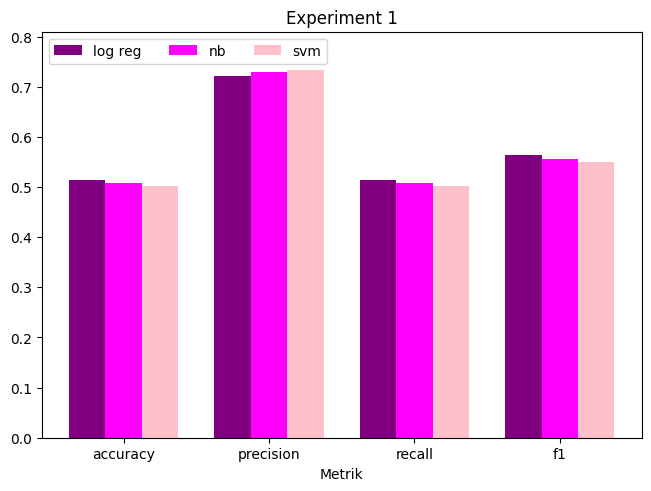

In [54]:
x = np.arange(len(columns)) # x-Achse der Graphiken definieren

width = 0.25
multiplier = 0
colors = ['purple', 'magenta', 'pink']

fig1, ax1 = plt.subplots(layout='constrained')

for model, metric_vals in eval_exp1.items():
    offset = width * multiplier
    rects = ax1.bar(x[2:] + offset, metric_vals, width, label=model, color=colors[multiplier])
    multiplier += 1

ax1.set_title('Experiment 1')
ax1.set_xlabel('Metrik')
ax1.set_xticks(x[2:] + width, columns[2:])
ax1.legend(loc='upper left', ncols=3)
ax1.set_ylim(0, 0.81, 0.1)

plt.show();

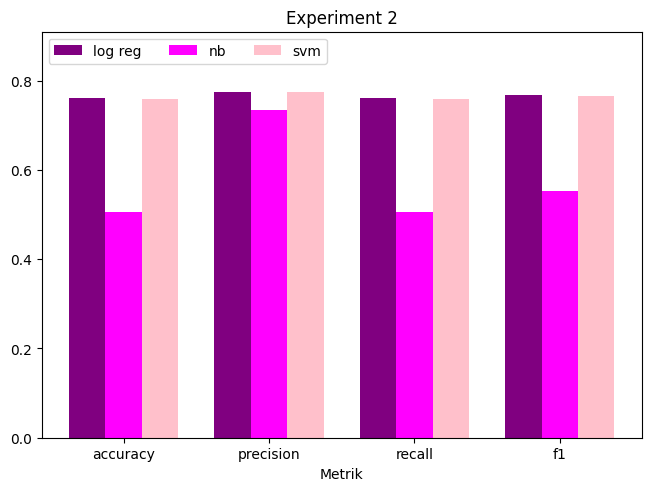

In [55]:
width = 0.25
multiplier = 0

fig2, ax2 = plt.subplots(layout='constrained')

for model, metric_vals in eval_exp2.items():
    offset = width * multiplier
    rects = ax2.bar(x[2:] + offset, metric_vals, width, label=model, color=colors[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_title('Experiment 2')
ax2.set_xlabel('Metrik')
ax2.set_xticks(x[2:] + width, columns[2:])
ax2.legend(loc='upper left', ncols=3)
ax2.set_ylim(0, 0.91, 0.1)

plt.show();